<a href="https://colab.research.google.com/github/lucasoliveira13/Digital_Image_Processing/blob/main/PDI_Atividade_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Grupo: Lucas Matheus Oliveira e Guilherme Vilarim

In [ ]:
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.image as img
from PIL import Image
import os
from collections import Counter

drive.mount('/content/drive')
dataset = '/content/drive/MyDrive/PDI/atividade_3'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Suavizar Imagens

In [ ]:
def reduce_noise(image, tamanho_janela,path):

    img_array = np.array(image)

    img_filtrada = np.zeros_like(img_array)

    tamanho = int((tamanho_janela - 1) / 2)

    for i in range(tamanho, img_array.shape[0] - tamanho):
        for j in range(tamanho, img_array.shape[1] - tamanho):
            janela = img_array[i - tamanho:i + tamanho + 1, j - tamanho:j + tamanho + 1]

            img_filtrada[i, j] = np.mean(janela)

    img.imsave(path,img_filtrada,cmap='gray')

    return img_filtrada


In [ ]:
def filtro_bilateral_gaussiano(imagem, sigma_s, sigma_r, path):
    imagem = np.asarray(imagem)

    alcance = int(2 * sigma_s)

    x, y = np.meshgrid(np.arange(-alcance, alcance+1), np.arange(-alcance, alcance+1))

    filtro_espacial = np.exp(-(x**2 + y**2) / (2 * sigma_s**2))

    filtro_espacial /= np.sum(filtro_espacial)

    imagem_filtrada = np.convolve(imagem.flatten(), filtro_espacial.flatten(), mode='same')
    imagem_filtrada = imagem_filtrada.reshape(imagem.shape)

    diferenca_intensidade = imagem - imagem_filtrada

    filtro_intensidade = np.exp(-(diferenca_intensidade**2) / (2 * sigma_r**2))

    imagem_filtrada = imagem_filtrada + filtro_intensidade * diferenca_intensidade

    imagem_filtrada = (imagem_filtrada - np.min(imagem_filtrada)) / (np.max(imagem_filtrada) - np.min(imagem_filtrada))

    plt.imsave(path, imagem_filtrada, cmap='gray')

    return imagem_filtrada

In [ ]:
def plot_histograma_4(imagens, titulos):
    num_imagens = len(imagens)

    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    for i in range(num_imagens):
        imagem_array = np.array(imagens[i])
        ax = axs[i // 2, i % 2]
        ax.hist(imagem_array.flatten(), bins=256, color='gray', alpha=0.5)
        ax.set_title(f'Histograma - {titulos[i]}')
        ax.set_xlabel('Intensidade')
        ax.set_ylabel('Frequência')

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_images_side_by_side(images, titles):
    num_images = len(images)

    fig, axes = plt.subplots(1, num_images, figsize=(12, 4))

    for i in range(num_images):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(titles[i])
        axes[i].axis('off')

    plt.tight_layout()

    plt.show()

In [ ]:
def plot_histograma_2(imagens):
    num_imagens = len(imagens)

    fig, axs = plt.subplots(1, num_imagens, figsize=(10, 4))

    for i in range(num_imagens):
        imagem_array = np.array(imagens[i])
        axs[i].hist(imagem_array.flatten(), bins=256, color='gray', alpha=0.5)
        axs[i].set_title(f'Histograma - Imagem {i+1}')
        axs[i].set_xlabel('Intensidade')
        axs[i].set_ylabel('Frequência')

    plt.tight_layout()
    plt.show()

##Leitura e Armazenamento das Imagens

In [ ]:
#LEITURA DAS IMAGENS
data_original = []
data_gaussian = []
data_media = []
data_gaussian_media = []
quest_1_path = '/content/drive/MyDrive/PDI/atividade_3'
file_list = os.listdir(quest_1_path)

for file_name in file_list:
    file_path = os.path.join(quest_1_path, file_name)
    print(file_path)
    if os.path.isfile(file_path):
      if 'Suavizar' in file_name:
        print('Imagem->',file_name)
        image = Image.open(file_path)
        data_original.append(image)
        final_path = f'/content/drive/MyDrive/PDI/atividade_3/result_quest_1/gaussian_{file_name}'
        filtro_bilateral_gaussiano(image,35,35,final_path)
        data_gaussian.append(Image.open(final_path))
        new_final_path = f'/content/drive/MyDrive/PDI/atividade_3/result_quest_1/gaussian_media_{file_name}'
        reduce_noise(Image.open(final_path),3,new_final_path)
        data_gaussian_media.append(Image.open(new_final_path))
        final_path = f'/content/drive/MyDrive/PDI/atividade_3/result_quest_1/media_{file_name}'
        reduce_noise(image,3,final_path)
        data_media.append(Image.open(final_path))

/content/drive/MyDrive/PDI/atividade_3/Agucar_1.jpg
/content/drive/MyDrive/PDI/atividade_3/Agucar_2.jpg
/content/drive/MyDrive/PDI/atividade_3/Agucar_3.jpg
/content/drive/MyDrive/PDI/atividade_3/Agucar_4.jpg
/content/drive/MyDrive/PDI/atividade_3/Agucar_5.jpg
/content/drive/MyDrive/PDI/atividade_3/Agucar_6.jpg
/content/drive/MyDrive/PDI/atividade_3/Suavizar_1.jpg
Imagem-> Suavizar_1.jpg
/content/drive/MyDrive/PDI/atividade_3/Suavizar_2.jpg
Imagem-> Suavizar_2.jpg
/content/drive/MyDrive/PDI/atividade_3/Suavizar_3.jpg
Imagem-> Suavizar_3.jpg
/content/drive/MyDrive/PDI/atividade_3/Suavizar_4.jpg
Imagem-> Suavizar_4.jpg
/content/drive/MyDrive/PDI/atividade_3/Suavizar_5.jpg
Imagem-> Suavizar_5.jpg
/content/drive/MyDrive/PDI/atividade_3/Suavizar_6.jpg
Imagem-> Suavizar_6.jpg
/content/drive/MyDrive/PDI/atividade_3/result_quest_1
/content/drive/MyDrive/PDI/atividade_3/result_quest_2


##Resultados Suavizar

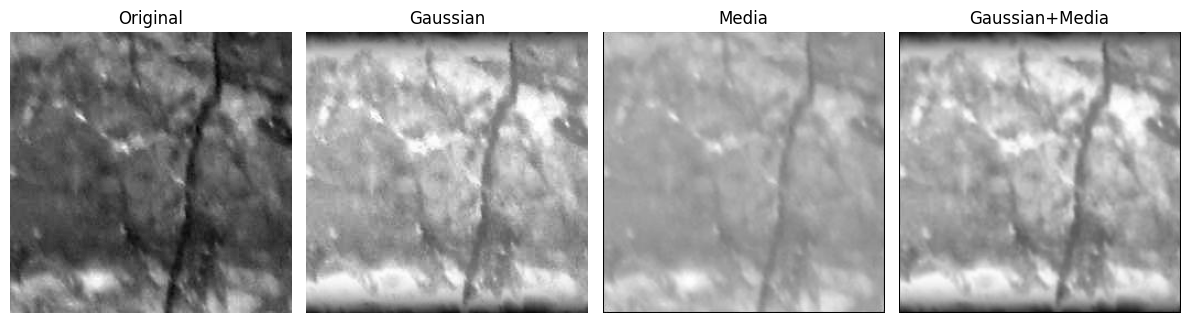

In [ ]:
images = [data_original[0],data_gaussian[0],data_media[0],data_gaussian_media[0]]
titles = ['Original','Gaussian','Media','Gaussian+Media']
plot_images_side_by_side(images, titles)

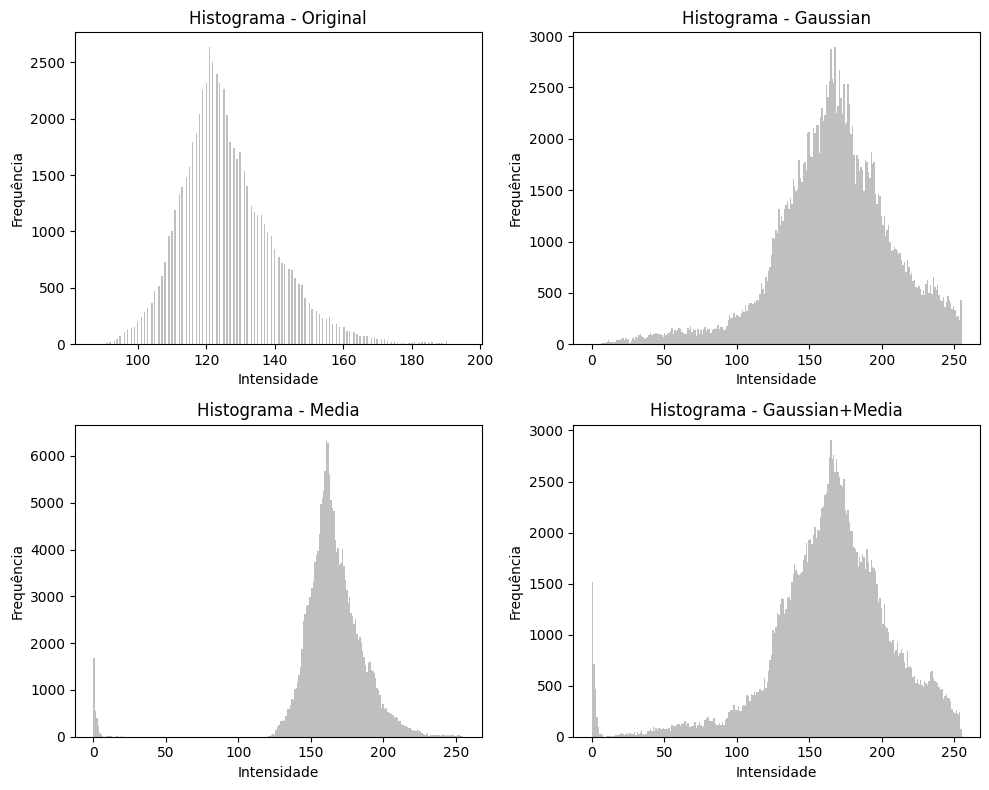

In [ ]:
plot_histograma_4(images,titles)

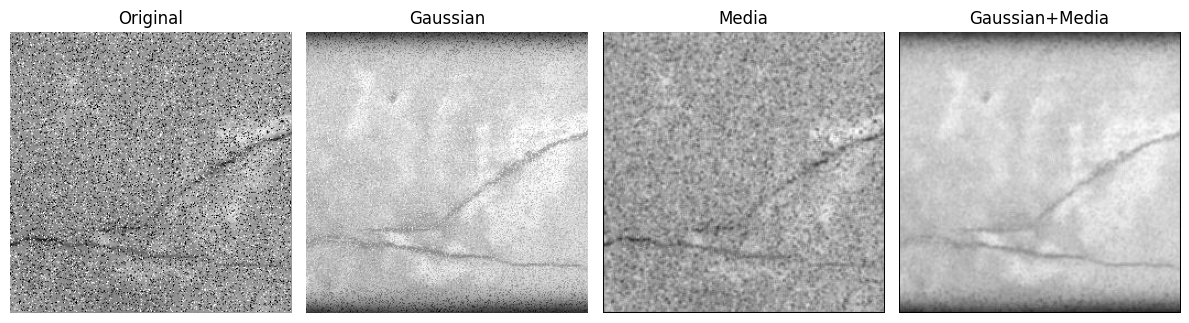

In [ ]:
images = [data_original[5],data_gaussian[5],data_media[5],data_gaussian_media[5]]
plot_images_side_by_side(images, titles)

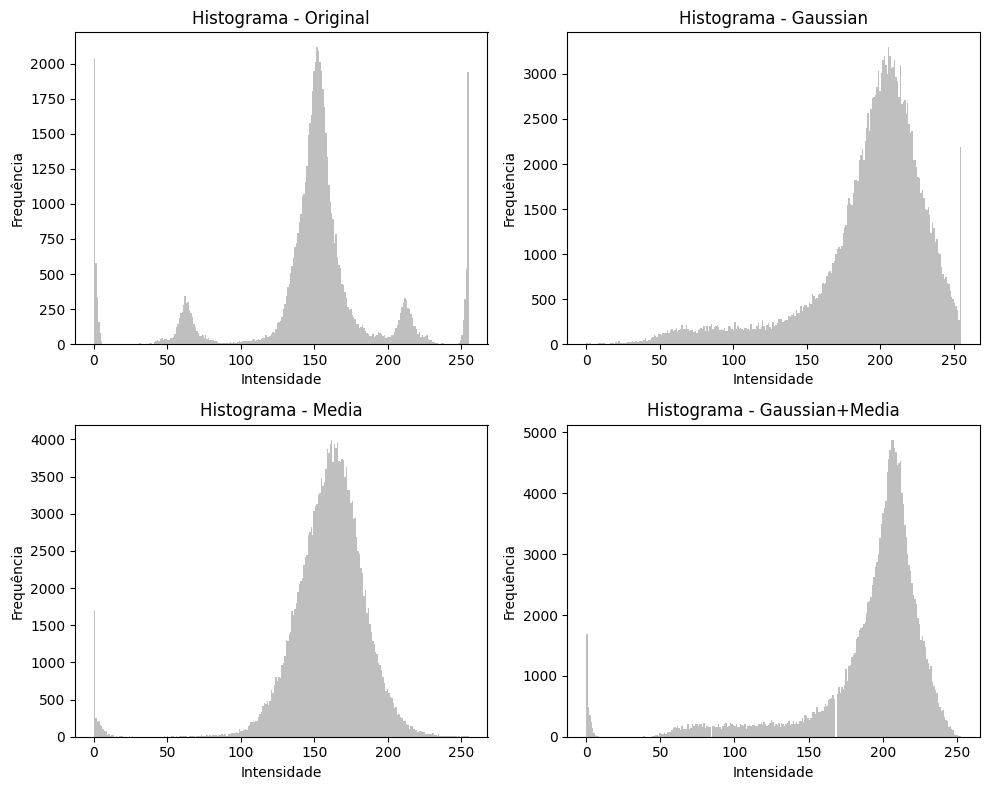

In [ ]:
plot_histograma_4(images,titles)

#Aguçar imagem

In [ ]:
def median_filter(img_array,tamanho_janela):

    tamanho = int((tamanho_janela - 1) / 2)

    img_filtrada = np.zeros_like(img_array)

    for i in range(tamanho, img_array.shape[0] - tamanho):
        for j in range(tamanho, img_array.shape[1] - tamanho):
            janela = img_array[i - tamanho:i + tamanho + 1, j - tamanho:j + tamanho + 1]

            img_filtrada[i, j] = np.mean(janela)

    return img_filtrada

In [ ]:
def laplacian_operator(image):

    kernel = np.array([[1, 1, 1],
                       [1, -8, 1],
                       [1, 1, 1]])

    image_array = np.array(image)

    laplacian = np.zeros_like(image_array, dtype=np.float64)
    for i in range(1, image_array.shape[0] - 1):
        for j in range(1, image_array.shape[1] - 1):
            laplacian[i, j] = np.sum(image_array[i-1:i+2, j-1:j+2] * kernel)

    return laplacian

In [ ]:
def sharpen_image(imagem,path):
  imagem = np.asarray(imagem)

  gray_image_mf = median_filter(imagem, 1)

  lap = laplacian_operator(imagem)

  sharp = imagem - 0.7 * lap

  sharp = sharp.astype(np.uint8)

  plt.imsave(path, sharp, cmap='gray')

  return sharp

##Lendo e Armazenando as Imagens

In [ ]:
#LEITURA DAS IMAGENS
data_sharpen = []
data_original = []
quest_1_path = '/content/drive/MyDrive/PDI/atividade_3/'
file_list = os.listdir(quest_1_path)

for file_name in file_list:
    file_path = os.path.join(quest_1_path, file_name)
    print(file_path)
    if os.path.isfile(file_path):
      if 'Agucar' in file_name:
        print('Imagem->',file_name)
        image = Image.open(file_path)
        data_original.append(image)
        final_path = f'/content/drive/MyDrive/PDI/atividade_3/result_quest_2/sharpen_{file_name}'
        sharpen_image(image,final_path)
        data_sharpen.append(Image.open(final_path))
        new_final_path = f'/content/drive/MyDrive/PDI/atividade_3/result_quest_1/gaussian_media_{file_name}'

/content/drive/MyDrive/PDI/atividade_3/Agucar_1.jpg
Imagem-> Agucar_1.jpg
/content/drive/MyDrive/PDI/atividade_3/Agucar_2.jpg
Imagem-> Agucar_2.jpg
/content/drive/MyDrive/PDI/atividade_3/Agucar_3.jpg
Imagem-> Agucar_3.jpg
/content/drive/MyDrive/PDI/atividade_3/Agucar_4.jpg
Imagem-> Agucar_4.jpg
/content/drive/MyDrive/PDI/atividade_3/Agucar_5.jpg
Imagem-> Agucar_5.jpg
/content/drive/MyDrive/PDI/atividade_3/Agucar_6.jpg
Imagem-> Agucar_6.jpg
/content/drive/MyDrive/PDI/atividade_3/Suavizar_1.jpg
/content/drive/MyDrive/PDI/atividade_3/Suavizar_2.jpg
/content/drive/MyDrive/PDI/atividade_3/Suavizar_3.jpg
/content/drive/MyDrive/PDI/atividade_3/Suavizar_4.jpg
/content/drive/MyDrive/PDI/atividade_3/Suavizar_5.jpg
/content/drive/MyDrive/PDI/atividade_3/Suavizar_6.jpg
/content/drive/MyDrive/PDI/atividade_3/result_quest_1
/content/drive/MyDrive/PDI/atividade_3/result_quest_2


##Resultados Aguçar

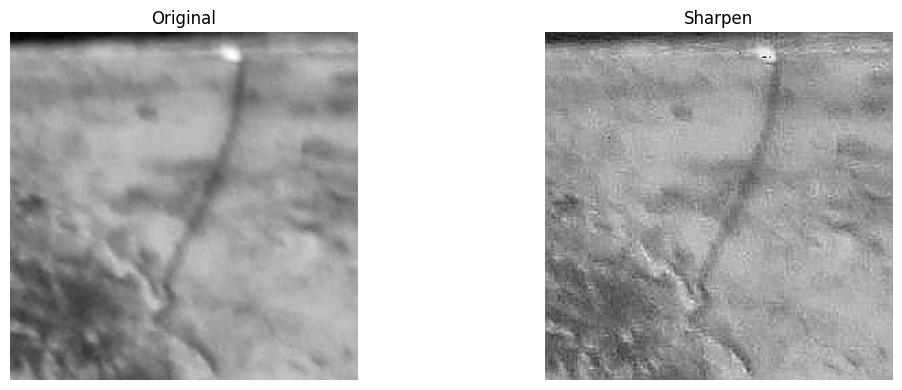

In [ ]:
images = [data_original[0],data_sharpen[0]]
titles = ['Original','Sharpen']
plot_images_side_by_side(images,titles)

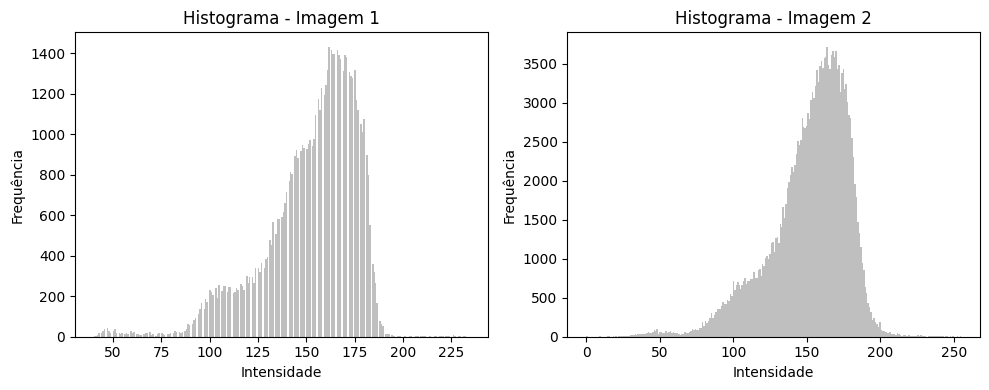

In [ ]:
plot_histograma_2(images)

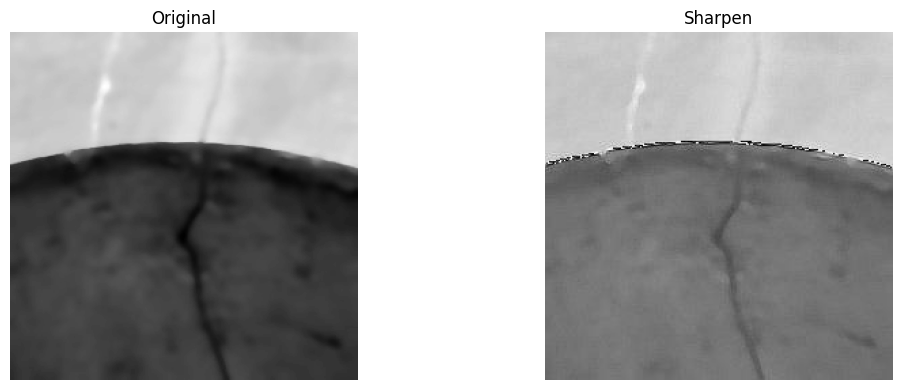

In [ ]:
images = [data_original[5],data_sharpen[5]]
plot_images_side_by_side(images,titles)

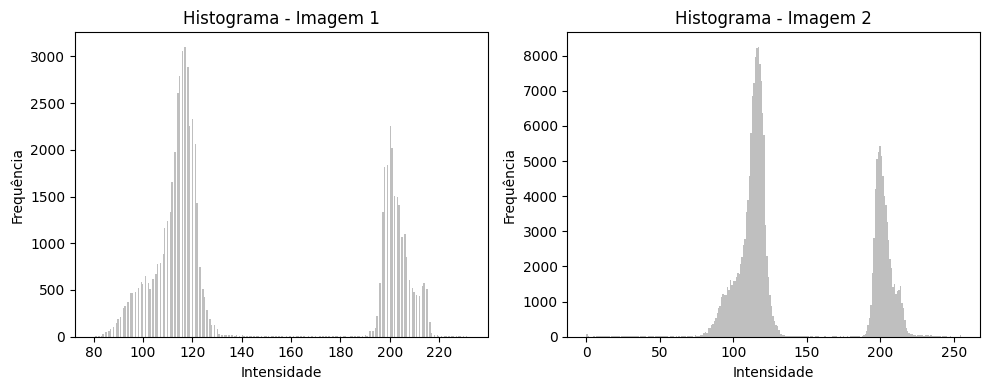

In [ ]:
plot_histograma_2(images)